# Sales Report in 2019  

## 1. Data collection

### Import and Unzip

In [1]:
import zipfile
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Unzip file
path='Data/Sales2019.zip'
extracted_path='Data/Sales2019/'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)
print("Files extracted to:", extracted_path)

Files extracted to: Data/Sales2019/


### Merge 12 months data and load new csv

In [3]:
data_frames = []
all_length = []
for file in os.listdir(extracted_path):
    if file.endswith('.csv'):
        filepath = extracted_path + file
        df1 = pd.read_csv(filepath)
        data_frames.append(df1)
        result = pd.concat(data_frames)
        length_1month = len(df1.index)
        all_length.append(length_1month)

result.to_csv(extracted_path+'Sales2019.csv', index=False)
df=pd.read_csv(extracted_path+'Sales2019.csv')

## 2. Explore data

In [4]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Data Cleaning and Preprocessing

In [7]:
## Rename columns
df = df.rename(columns={'Quantity Ordered': 'Quantity','Price Each':'Price','Order Date':'Date','Purchase Address':'Address'})
df.head()

,Order ID,Product,Quantity,Price,Date,Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [8]:
## Check null
df.isnull().sum()

Order ID    545
Product     545
Quantity    545
Price       545
Date        545
Address     545
dtype: int64

In [9]:
## Drop null
df = df.dropna(how='all')
# Check again
df.isnull().sum()

Order ID    0
Product     0
Quantity    0
Price       0
Date        0
Address     0
dtype: int64

In [10]:
## Check duplicate
df.duplicated().sum()

618

In [11]:
# View dupicate 
df[df.duplicated()==True]

,Order ID,Product,Quantity,Price,Date,Address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [12]:
# Remove dupicate
df = df[df['Order ID'] != 'Order ID']
## Check duplicate again
df.duplicated().sum()

264

In [13]:
#View duplicate values again for sure
df[df.duplicated()==True]

,Order ID,Product,Quantity,Price,Date,Address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
4126,145143,Lightning Charging Cable,1,14.95,01/06/19 03:01,"182 Jefferson St, San Francisco, CA 94016"
5811,146765,Google Phone,1,600,01/21/19 11:23,"918 Highland St, New York City, NY 10001"
6807,147707,Wired Headphones,1,11.99,01/04/19 16:50,"883 4th St, Dallas, TX 75001"
8134,148984,USB-C Charging Cable,1,11.95,01/08/19 17:36,"562 14th St, Boston, MA 02215"
...,...,...,...,...,...,...
184940,257530,USB-C Charging Cable,1,11.95,09/03/19 11:13,"192 Johnson St, San Francisco, CA 94016"
186173,258715,Lightning Charging Cable,1,14.95,09/15/19 16:50,"550 10th St, Portland, OR 97035"
186508,259035,27in FHD Monitor,1,149.99,09/29/19 13:52,"327 Lake St, San Francisco, CA 94016"
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [14]:
## Check for non-numeric values
df['Quantity'].unique()


array(['1', '2', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [15]:
# Check type
df.dtypes

Order ID    object
Product     object
Quantity    object
Price       object
Date        object
Address     object
dtype: object

In [16]:
## Change data types to calculate and separate data
df['Quantity'] = df['Quantity'].astype(int) 
df['Price'] = df['Price'].astype(float) 
df['Date'] = pd.to_datetime(df['Date']) 
df.dtypes

Order ID            object
Product             object
Quantity             int32
Price              float64
Date        datetime64[ns]
Address             object
dtype: object

In [17]:
# Calculate
df['Sales'] = df['Quantity'] * df['Price']
# Separate M,D,H
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.dayofweek
df['Hour'] = df['Date'].dt.hour 

# Create a city column
df['City'] = df['Address'].apply(lambda address:address.split(',')[1])
df.head()

,Order ID,Product,Quantity,Price,Date,Address,Sales,Month,Day,Hour,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,1,21,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,0,14,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,3,13,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,5,20,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,4,11,Austin


In [18]:
df.columns

Index(['Order ID', 'Product', 'Quantity', 'Price', 'Date', 'Address', 'Sales',
       'Month', 'Day', 'Hour', 'City'],
      dtype='object')

In [19]:
# rearrange columns for better overview
new_cols = ['Order ID','Date','Month', 'Day', 'Hour', 'Address','City','Product', 'Quantity', 'Price', 'Sales']
df=df[new_cols]
df.head()

,Order ID,Date,Month,Day,Hour,Address,City,Product,Quantity,Price,Sales
0,141234,2019-01-22 21:25:00,1,1,21,"944 Walnut St, Boston, MA 02215",Boston,iPhone,1,700.00,700.00
1,141235,2019-01-28 14:15:00,1,0,14,"185 Maple St, Portland, OR 97035",Portland,Lightning Charging Cable,1,14.95,14.95
2,141236,2019-01-17 13:33:00,1,3,13,"538 Adams St, San Francisco, CA 94016",San Francisco,Wired Headphones,2,11.99,23.98
3,141237,2019-01-05 20:33:00,1,5,20,"738 10th St, Los Angeles, CA 90001",Los Angeles,27in FHD Monitor,1,149.99,149.99
4,141238,2019-01-25 11:59:00,1,4,11,"387 10th St, Austin, TX 73301",Austin,Wired Headphones,1,11.99,11.99


## 3. Data Visualisation and Analysis

### 3.1 How much order requests in 2019 ? => `178437`

In [20]:
df.groupby('Order ID')['Order ID'].count()

Order ID
141234    1
141235    1
141236    1
141237    1
141238    1
         ..
319666    1
319667    1
319668    1
319669    1
319670    1
Name: Order ID, Length: 178437, dtype: int64

### 3.2 Total Sales in 2019 => `34492035.97`

In [21]:
df['Sales'].sum().round(2)

34492035.97

### 3.3 Which month has highest revenue and lowest revenue ? => `highest: 12, lowest: 1`

C:\Users\lehoa\AppData\Local\Temp\ipykernel_18512\3059985714.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_months=df.groupby('Month').sum()['Sales']


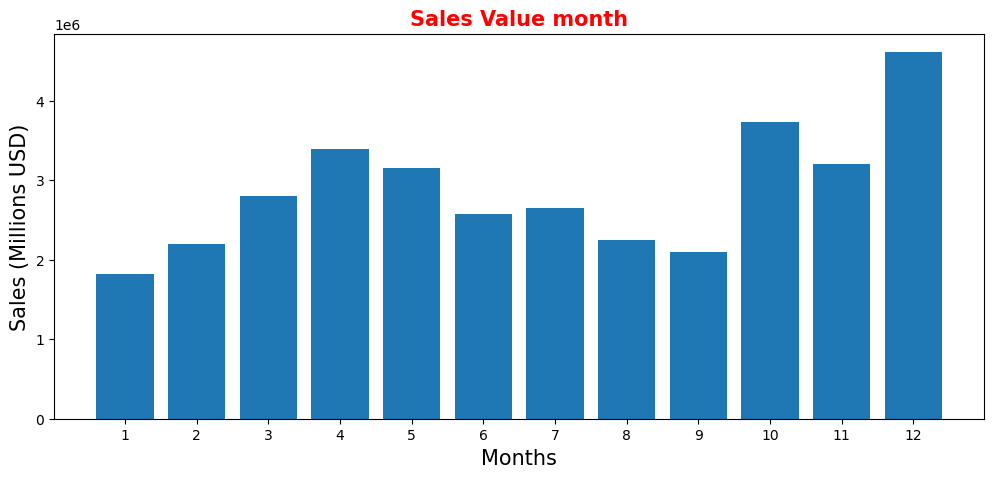

In [22]:
months = range(1,13)
sale_months=df.groupby('Month').sum()['Sales']
plt.figure(figsize=(12,5))
plt.bar(x=months, height=sale_months)
plt.xticks(months)
plt.title("Sales Value month",fontsize=15, fontweight="bold", color='r')
plt.xlabel('Months', fontsize=15)
plt.ylabel('Sales (Millions USD)',fontsize=15)
plt.show()

### 3.4 When do we have the most orders? => `12 p.m and 19 p.m` 

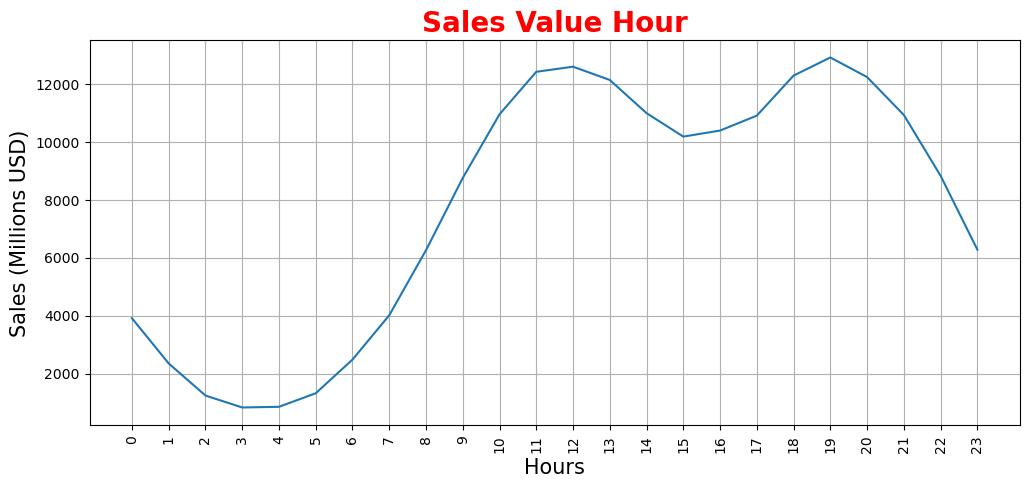

In [25]:
sales_hours = df.groupby('Hour').count()['Sales']
hours = list(sales_hours.index)
plt.figure(figsize=(12,5))
plt.plot(hours, sales_hours)
plt.xticks(hours, rotation=90)
plt.title("Sales Value Hour",fontsize=20, fontweight="bold", color='r')
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Sales (Millions USD)',fontsize=15)
plt.grid(True)
plt.show()

### 3.5 Which city bought the most? => `San Francisco`

Text(0, 0.5, 'City')

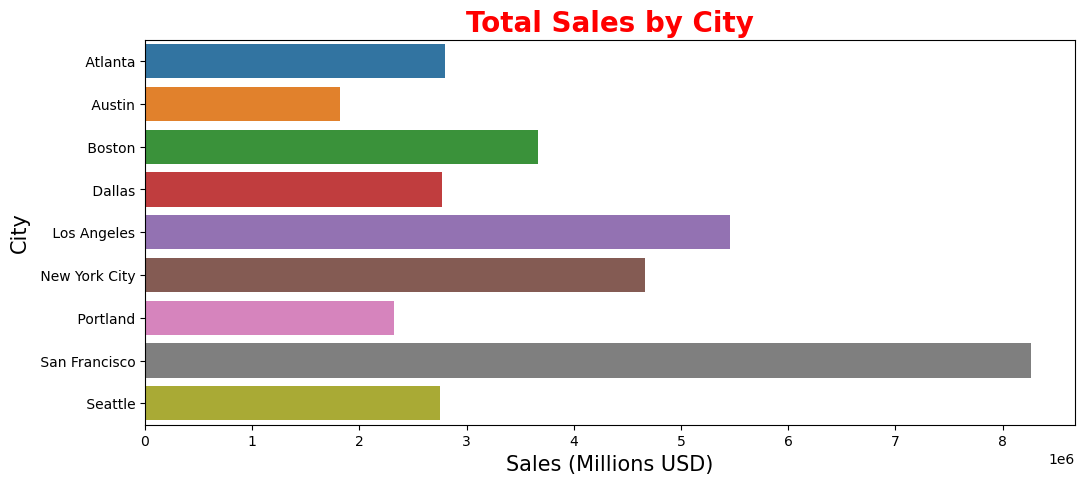

In [26]:
city_rev = df.groupby('City')['Sales'].sum()
city_rev = city_rev.reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(
    x='Sales',
    y='City',
    data=city_rev)
plt.title('Total Sales by City', fontsize=20, fontweight="bold", color='r')
plt.xlabel('Sales (Millions USD)', fontsize=15)
plt.ylabel('City', fontsize=15)

In [31]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head()

C:\Users\lehoa\AppData\Local\Temp\ipykernel_18512\154186200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


iPhone, Lightning Charging Cable         882
Google Phone, USB-C Charging Cable       856
iPhone, Wired Headphones                 361
Vareebadd Phone, USB-C Charging Cable    312
Google Phone, Wired Headphones           303
Name: All Products, dtype: int64